In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [45]:
# create dummy

N = 1000 # number of timestep
Tp = 800 # boundary between train and test

t = np.arange(0,N)
x = np.sin(0.02*t) + 2*np.random.rand(N)
df = pd.DataFrame(x, columns=["Data"])
df

,Data
0,0.049785
1,1.621037
2,1.970767
3,1.712238
4,1.401703
...,...
995,2.519833
996,2.723317
997,0.944658
998,2.421503


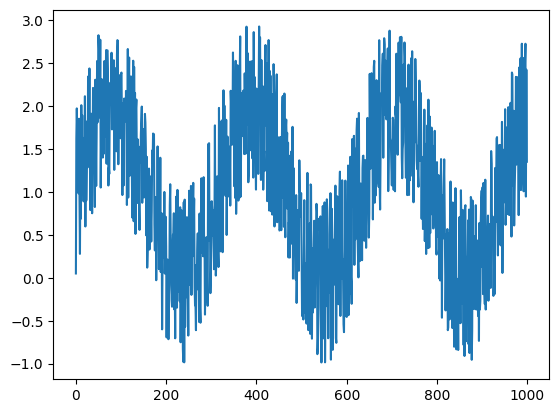

In [46]:
plt.plot(df)

In [47]:
# splitting training and testing set

train = df.iloc[:Tp]
train

,Data
0,0.049785
1,1.621037
2,1.970767
3,1.712238
4,1.401703
...,...
795,1.709940
796,0.766981
797,1.240260
798,0.333274


In [48]:
test = df.iloc[Tp:]
test

,Data
800,1.345730
801,0.502864
802,0.478649
803,1.194311
804,1.189530
...,...
995,2.519833
996,2.723317
997,0.944658
998,2.421503


In [49]:
# construct input batches

step = 4 # represent 4 data for previous step use as input to predict
test_array = test.to_numpy()
test_array

array([[ 1.34572988],
       [ 0.50286433],
       [ 0.47864869],
       [ 1.19431127],
       [ 1.18953047],
       [-0.00913762],
       [ 0.62036987],
       [-0.03139732],
       [ 1.04149753],
       [ 1.38089179],
       [ 0.76927203],
       [-0.46494108],
       [ 0.9578343 ],
       [ 0.69530062],
       [ 0.45849641],
       [ 1.06426164],
       [ 1.378117  ],
       [ 0.81966906],
       [ 0.32608215],
       [-0.38024729],
       [-0.02929437],
       [ 0.50940935],
       [ 0.08860282],
       [ 0.56667543],
       [-0.6099228 ],
       [-0.57846509],
       [-0.23423053],
       [ 0.51693068],
       [-0.48419744],
       [ 0.81242609],
       [ 1.12011367],
       [ 0.60622639],
       [ 0.0670301 ],
       [ 0.28161137],
       [-0.58486079],
       [ 0.87584464],
       [ 0.23049428],
       [-0.18295335],
       [-0.8029315 ],
       [-0.1063569 ],
       [-0.12863845],
       [ 1.04254444],
       [ 0.16491506],
       [-0.8334452 ],
       [-0.01138494],
       [-0

In [50]:
test_array.shape

(200, 1)

In [51]:
test_array.flatten()

array([ 1.34572988,  0.50286433,  0.47864869,  1.19431127,  1.18953047,
       -0.00913762,  0.62036987, -0.03139732,  1.04149753,  1.38089179,
        0.76927203, -0.46494108,  0.9578343 ,  0.69530062,  0.45849641,
        1.06426164,  1.378117  ,  0.81966906,  0.32608215, -0.38024729,
       -0.02929437,  0.50940935,  0.08860282,  0.56667543, -0.6099228 ,
       -0.57846509, -0.23423053,  0.51693068, -0.48419744,  0.81242609,
        1.12011367,  0.60622639,  0.0670301 ,  0.28161137, -0.58486079,
        0.87584464,  0.23049428, -0.18295335, -0.8029315 , -0.1063569 ,
       -0.12863845,  1.04254444,  0.16491506, -0.8334452 , -0.01138494,
       -0.48562857, -0.29528466, -0.84090927, -0.07769706,  0.48653578,
        0.70677733,  0.46823555, -0.52891004,  1.01811096,  0.66995246,
        0.72387871, -0.30125142,  0.78969482,  0.09272824, -0.78194642,
        0.39522699, -0.91051611,  0.81697392,  0.84434504, -0.73984737,
       -0.1197848 ,  0.24206764,  0.0315367 ,  0.1917198 ,  0.66

In [52]:
test_array.flatten().shape

(200,)

In [53]:
test_array = test_array.flatten()

In [54]:
X = [] # palceholder for input batch
Y = [] # placeholder for output batch

for i in range(0, len(test_array)-step):
    d = i + step
    X.append(test_array[i:d,])
    Y.append(test_array[d,])

In [55]:
X_test = np.array(X)
X_test

array([[ 1.34572988,  0.50286433,  0.47864869,  1.19431127],
       [ 0.50286433,  0.47864869,  1.19431127,  1.18953047],
       [ 0.47864869,  1.19431127,  1.18953047, -0.00913762],
       [ 1.19431127,  1.18953047, -0.00913762,  0.62036987],
       [ 1.18953047, -0.00913762,  0.62036987, -0.03139732],
       [-0.00913762,  0.62036987, -0.03139732,  1.04149753],
       [ 0.62036987, -0.03139732,  1.04149753,  1.38089179],
       [-0.03139732,  1.04149753,  1.38089179,  0.76927203],
       [ 1.04149753,  1.38089179,  0.76927203, -0.46494108],
       [ 1.38089179,  0.76927203, -0.46494108,  0.9578343 ],
       [ 0.76927203, -0.46494108,  0.9578343 ,  0.69530062],
       [-0.46494108,  0.9578343 ,  0.69530062,  0.45849641],
       [ 0.9578343 ,  0.69530062,  0.45849641,  1.06426164],
       [ 0.69530062,  0.45849641,  1.06426164,  1.378117  ],
       [ 0.45849641,  1.06426164,  1.378117  ,  0.81966906],
       [ 1.06426164,  1.378117  ,  0.81966906,  0.32608215],
       [ 1.378117  ,  0.

In [56]:
X_test.shape

(196, 4)

In [57]:
y_test = np.array(Y)
y_test

array([ 1.18953047, -0.00913762,  0.62036987, -0.03139732,  1.04149753,
        1.38089179,  0.76927203, -0.46494108,  0.9578343 ,  0.69530062,
        0.45849641,  1.06426164,  1.378117  ,  0.81966906,  0.32608215,
       -0.38024729, -0.02929437,  0.50940935,  0.08860282,  0.56667543,
       -0.6099228 , -0.57846509, -0.23423053,  0.51693068, -0.48419744,
        0.81242609,  1.12011367,  0.60622639,  0.0670301 ,  0.28161137,
       -0.58486079,  0.87584464,  0.23049428, -0.18295335, -0.8029315 ,
       -0.1063569 , -0.12863845,  1.04254444,  0.16491506, -0.8334452 ,
       -0.01138494, -0.48562857, -0.29528466, -0.84090927, -0.07769706,
        0.48653578,  0.70677733,  0.46823555, -0.52891004,  1.01811096,
        0.66995246,  0.72387871, -0.30125142,  0.78969482,  0.09272824,
       -0.78194642,  0.39522699, -0.91051611,  0.81697392,  0.84434504,
       -0.73984737, -0.1197848 ,  0.24206764,  0.0315367 ,  0.1917198 ,
        0.66836125, -0.7727348 ,  0.79348955, -0.87586558, -0.18

In [58]:
y_test.shape

(196,)

In [59]:
train_array = train.to_numpy()
train_array = train_array.flatten()

X = [] # palceholder for input batch
Y = [] # placeholder for output batch

for i in range(0, len(train_array)-step):
    d = i + step
    X.append(train_array[i:d,])
    Y.append(train_array[d,])
X_train = np.array(X)
y_train = np.array(Y)

In [60]:
X_train

array([[0.04978461, 1.62103696, 1.97076748, 1.71223772],
       [1.62103696, 1.97076748, 1.71223772, 1.40170266],
       [1.97076748, 1.71223772, 1.40170266, 1.12697721],
       ...,
       [0.73105226, 1.24663318, 1.70994008, 0.76698132],
       [1.24663318, 1.70994008, 0.76698132, 1.24025976],
       [1.70994008, 0.76698132, 1.24025976, 0.33327393]])

In [61]:
X_train.shape

(796, 4)

In [62]:
y_train

array([ 1.40170266,  1.12697721,  0.98216942,  1.85063415,  0.91488083,
        0.27795925,  1.43095894,  0.68674031,  2.00829352,  1.23110565,
        1.89122599,  0.97445562,  1.35600339,  0.88898193,  1.6274861 ,
        1.08509465,  2.11229639,  0.59656254,  1.82066468,  0.89849337,
        1.23460672,  1.76348184,  1.2848689 ,  2.34170055,  1.50206707,
        1.7882105 ,  2.43586024,  1.41517246,  0.78733774,  1.84491238,
        1.9092393 ,  0.9665207 ,  0.75052639,  1.4589649 ,  2.20915995,
        1.53065521,  1.71929622,  1.51472806,  0.82328089,  2.30451029,
        1.73457037,  1.06893327,  1.68475823,  2.52240183,  1.80861806,
        2.13999468,  2.82222846,  2.6621951 ,  1.86589653,  1.89610735,
        2.76988775,  1.04975156,  1.67328518,  2.31342512,  1.92250341,
        1.39997571,  1.39935477,  2.14044092,  1.44467883,  2.52133736,
        1.64024771,  1.67257734,  2.34052136,  2.64938547,  1.32684789,
        2.63714245,  2.64674131,  2.42626502,  1.07359446,  1.28

In [63]:
y_train.shape

(796,)

In [64]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step,1), activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1))

In [65]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(loss="mean_squared_error", metrics= [RootMeanSquaredError()])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
50/50 [==============================] - 0s 727us/step - loss: 1.0057 - root_mean_squared_error: 1.0029
Epoch 2/100
50/50 [==============================] - 0s 581us/step - loss: 0.4098 - root_mean_squared_error: 0.6401
Epoch 3/100
50/50 [==============================] - 0s 566us/step - loss: 0.4011 - root_mean_squared_error: 0.6333
Epoch 4/100
50/50 [==============================] - 0s 563us/step - loss: 0.3975 - root_mean_squared_error: 0.6305
Epoch 5/100
50/50 [==============================] - 0s 555us/step - loss: 0.3974 - root_mean_squared_error: 0.6304
Epoch 6/100
50/50 [==============================] - 0s 563us/step - loss: 0.3906 - root_mean_squared_error: 0.6250
Epoch 7/100
50/50 [==============================] - 0s 562us/step - loss: 0.3892 - root_mean_squared_error: 0.6239
Epoch 8/100
50/50 [==============================] - 0s 561us/step - loss: 0.3874 - root_mean_squared_error: 0.6224
Epoch 9/100
50/50 [==============================] - 0s 565us/step - los

In [68]:
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

7/7 [==============================] - 0s 528us/step


In [69]:
predicted_train = pd.DataFrame(predicted_train)
predicted_train

,0
0,1.413609
1,1.569033
2,1.475546
3,1.353656
4,1.485972
...,...
791,1.217418
792,1.047833
793,1.337764
794,1.315821


In [70]:
predicted_train.index

RangeIndex(start=0, stop=796, step=1)

In [71]:
predicted_train.index = predicted_train.index + step
predicted_train.index

RangeIndex(start=4, stop=800, step=1)

In [72]:
result = df.copy()
result['Predicted(Train)'] = predicted_train
result

,Data,Predicted(Train)
0,0.049785,NaN
1,1.621037,NaN
2,1.970767,NaN
3,1.712238,NaN
4,1.401703,1.413609
...,...,...
995,2.519833,NaN
996,2.723317,NaN
997,0.944658,NaN
998,2.421503,NaN


In [73]:
result.loc[799]

Data                0.270101
Predicted(Train)    1.036312
Name: 799, dtype: float64

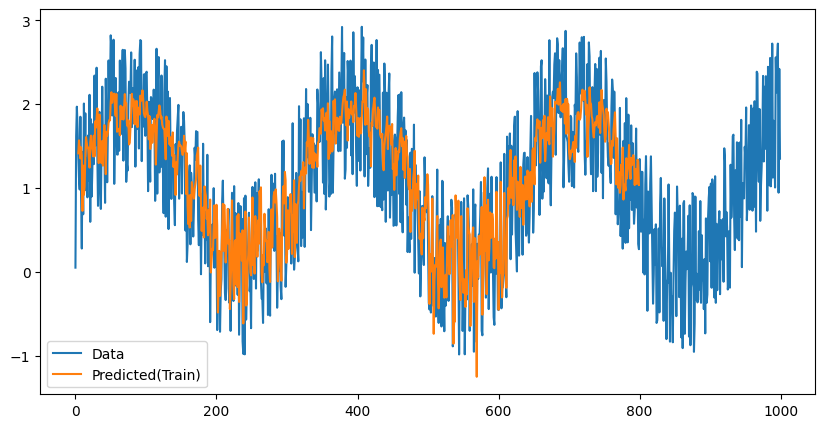

In [74]:
fig = plt.figure(figsize=(10,5))

plt.plot(result)
plt.legend(result.columns)

In [75]:
predicted_test = pd.DataFrame(predicted_test, columns=["Predicted(Test)"])
predicted_test

,Predicted(Test)
0,1.264222
1,0.921325
2,0.512770
3,0.896901
4,0.703590
...,...
191,1.804860
192,1.981258
193,2.203441
194,1.865845


In [76]:
test

,Data
800,1.345730
801,0.502864
802,0.478649
803,1.194311
804,1.189530
...,...
995,2.519833
996,2.723317
997,0.944658
998,2.421503


In [77]:
predicted_test.index = predicted_test.index + Tp + step
predicted_test

,Predicted(Test)
804,1.264222
805,0.921325
806,0.512770
807,0.896901
808,0.703590
...,...
995,1.804860
996,1.981258
997,2.203441
998,1.865845


In [79]:
predicted_test = predicted_test.reindex(np.arange(0, max(predicted_test.index)+1))
predicted_test

,Predicted(Test)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
995,1.804860
996,1.981258
997,2.203441
998,1.865845


In [82]:
predicted_test.loc[804]

Predicted(Test)    1.264222
Name: 804, dtype: float32

In [83]:
result['Predicted(Test)'] = predicted_test
result

,Data,Predicted(Train),Predicted(Test)
0,0.049785,NaN,NaN
1,1.621037,NaN,NaN
2,1.970767,NaN,NaN
3,1.712238,NaN,NaN
4,1.401703,1.413609,NaN
...,...,...,...
995,2.519833,NaN,1.804860
996,2.723317,NaN,1.981258
997,0.944658,NaN,2.203441
998,2.421503,NaN,1.865845


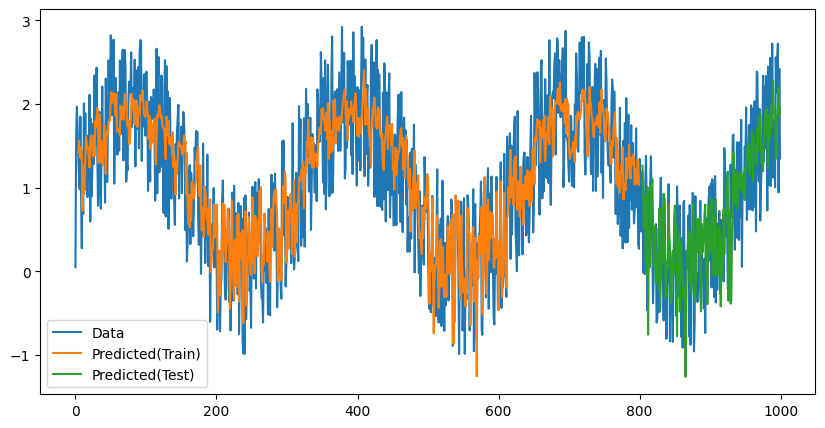

In [84]:
fig = plt.figure(figsize=(10,5))

plt.plot(result)
plt.legend(result.columns)